In [7]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df=pd.read_csv('SimDataCSVs/SimDataResults_1.csv')

In [28]:
folder_path = 'SimDataCSVs'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
dataframes = []

for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    df['FileName'] = file
    df.columns = [col.replace('UnknownCompartment_', '') for col in df.columns]
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)
for col in combined_df.columns:
    if col != 'FileName':
        combined_df[col] = combined_df[col].astype(float)

<Figure size 1400x700 with 0 Axes>

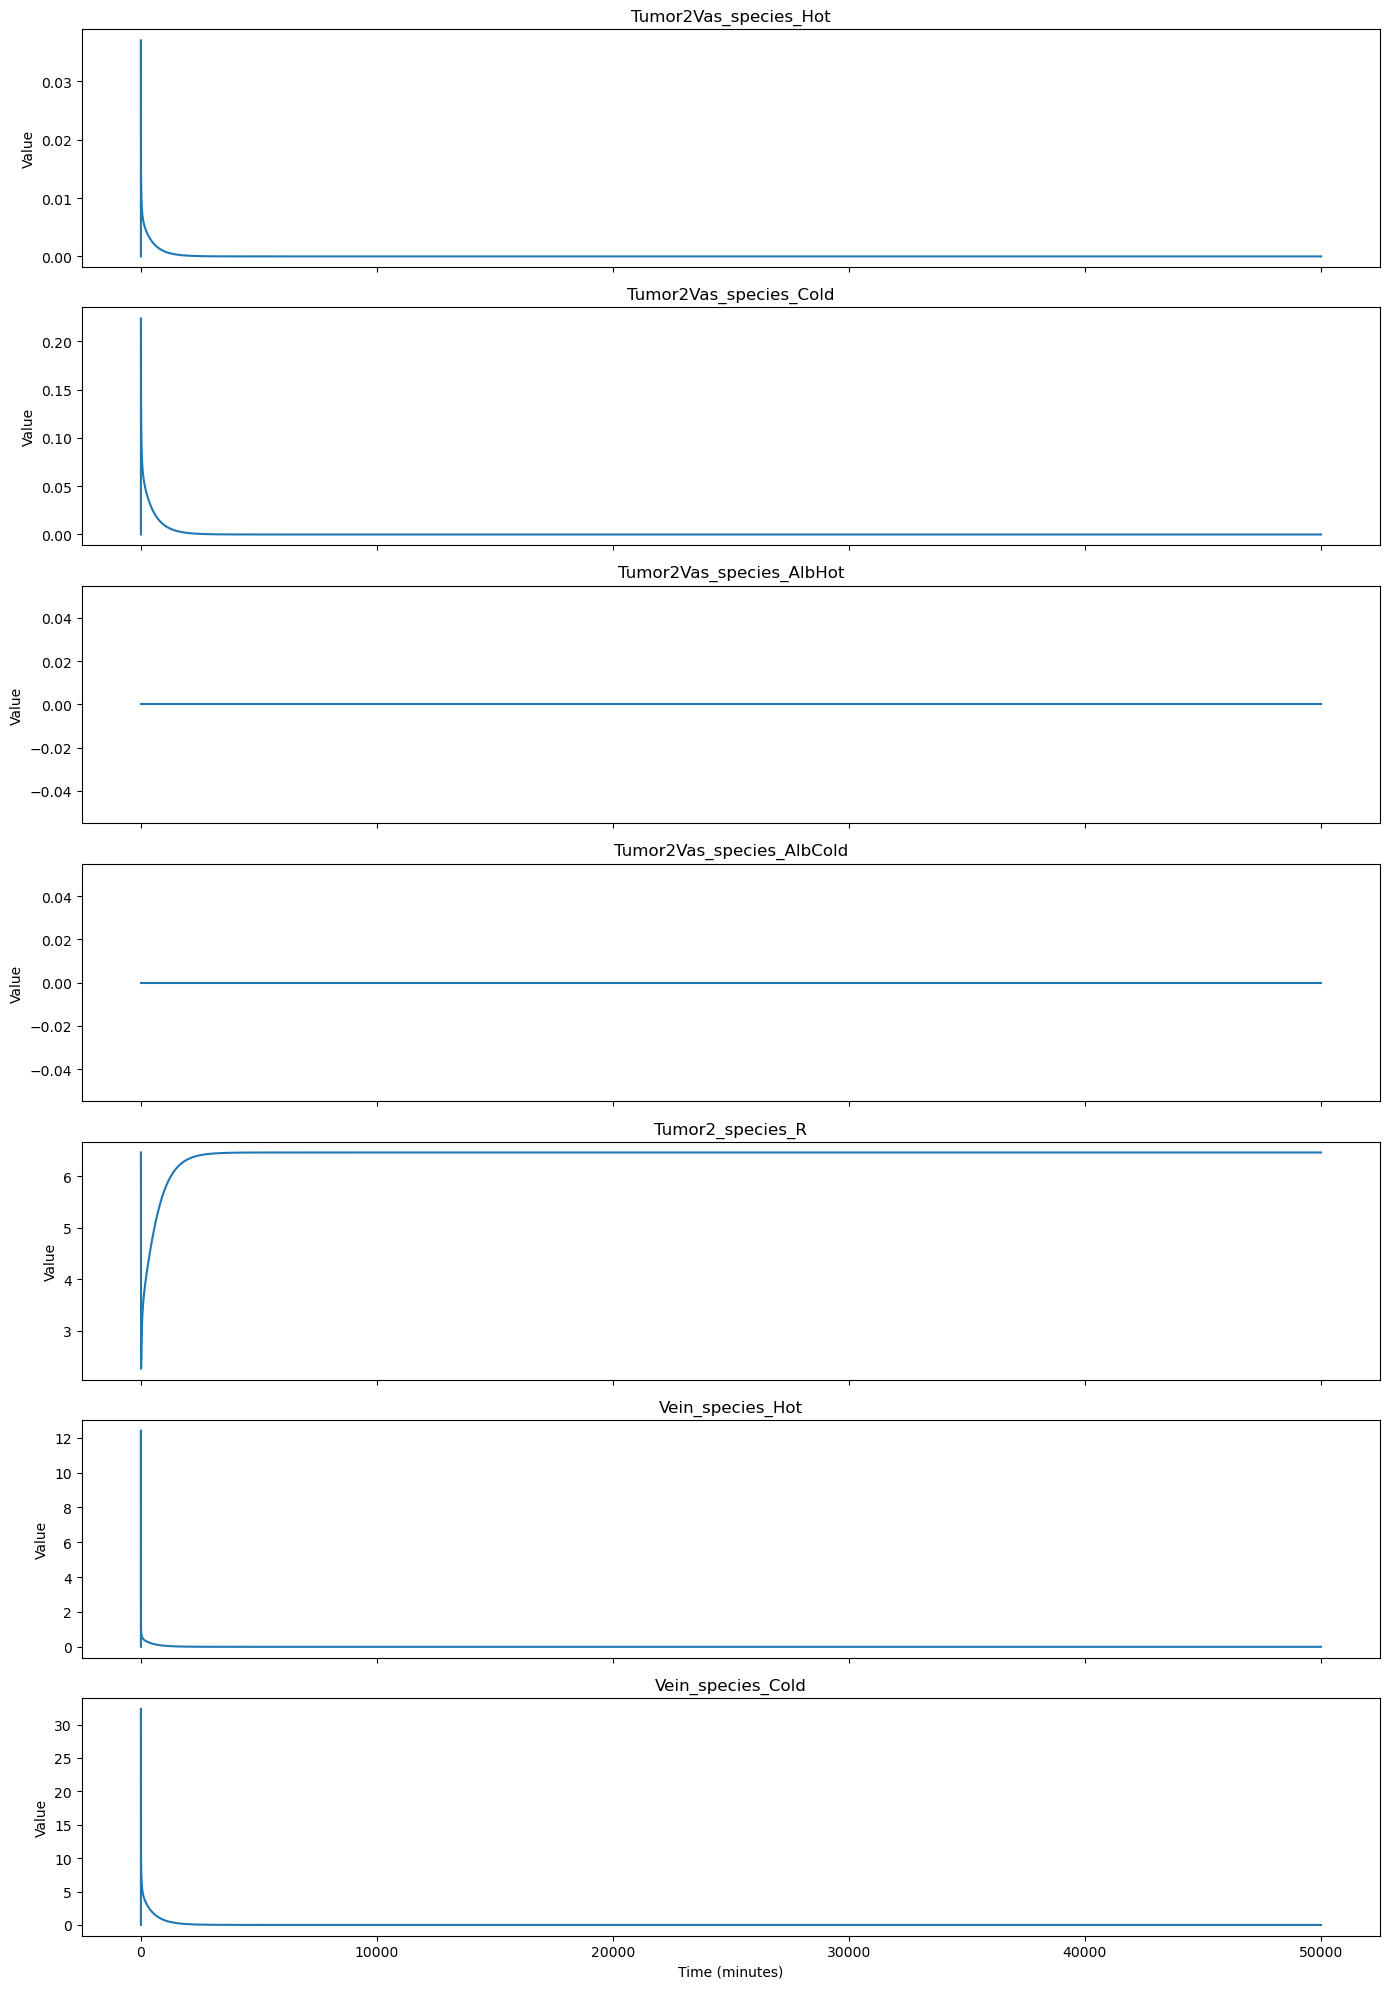

In [30]:
def plot_data(filename,combined_df=combined_df):
    filtered_df = combined_df[combined_df['FileName'] == filename]
    plt.figure(figsize=(14, 7))
    fig, axs = plt.subplots(7, 1, figsize=(14, 20), sharex=True)  # 7 rows, 1 column of subplots
    updated_observables = ['Tumor2Vas_species_Hot', 'Tumor2Vas_species_Cold',
                           'Tumor2Vas_species_AlbHot', 'Tumor2Vas_species_AlbCold',
                           'Tumor2_species_R', 'Vein_species_Hot', 'Vein_species_Cold']

    # Plotting each selected observable in its own subplot
    for ax, observable in zip(axs, updated_observables):
        ax.plot(filtered_df['Time'], filtered_df[observable], label=observable)
        ax.set_title(observable)
        ax.set_ylabel('Value')

    # Setting a common X label
    axs[-1].set_xlabel('Time (minutes)')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_data('SimDataResults_1.csv')